# Wine Project

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data

# # module for visualizations
# import viz_kmeans as vk

# my imports
import wrangle_lugo as w

In [2]:
df = w.get_wine_data()

In [3]:
df.shape

(6497, 13)

# NOTES

    - wine quality red:
        1,599 rows
        12 columns
    - wine quality white:
        4,898 rows
        12 columns
    - merged quality:
        6497 rows
        12 columns
        All columns are in float dtype with the exception of the quality
        
     

In [4]:
df = w.prep_wine_data(df)

In [12]:
df.head().T

,0,1,2,3,4
fixed_acidity,7.4,7.8,7.8,11.2,7.4
volatile_acidity,0.7,0.88,0.76,0.28,0.7
citric_acid,0.0,0.0,0.04,0.56,0.0
residual_sugar,1.9,2.6,2.3,1.9,1.9
chlorides,0.076,0.098,0.092,0.075,0.076
free_sulfur_dioxide,11.0,25.0,15.0,17.0,11.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0,34.0
density,0.9978,0.9968,0.997,0.998,0.9978
ph,3.51,3.2,3.26,3.16,3.51
sulphates,0.56,0.68,0.65,0.58,0.56


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [11]:
df.wine_type.value_counts()

white_wine    4898
red_wine      1599
Name: wine_type, dtype: int64

In [7]:
# Provides an aggregated sum of nulls by column
    #the default axis = 0 : r0w
    #so it's summing all r0ws
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [8]:
w.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
fixed_acidity,0,0.0
volatile_acidity,0,0.0
citric_acid,0,0.0
residual_sugar,0,0.0
chlorides,0,0.0
free_sulfur_dioxide,0,0.0
total_sulfur_dioxide,0,0.0
density,0,0.0
ph,0,0.0
sulphates,0,0.0


In [9]:
# Let's examine by row now!
    #now that we've changed the axis=1: co1
    #it's summing the columns

df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    0
4897    0
Length: 6497, dtype: int64

In [19]:
# list of columns
cols = ['fixed_acidity','volatile_acidity','citric_acid'
        ,'residual_sugar','chlorides','free_sulfur_dioxide'
       ,'total_sulfur_dioxide','density','ph','sulphates'
        ,'alcohol','quality','wine_type']

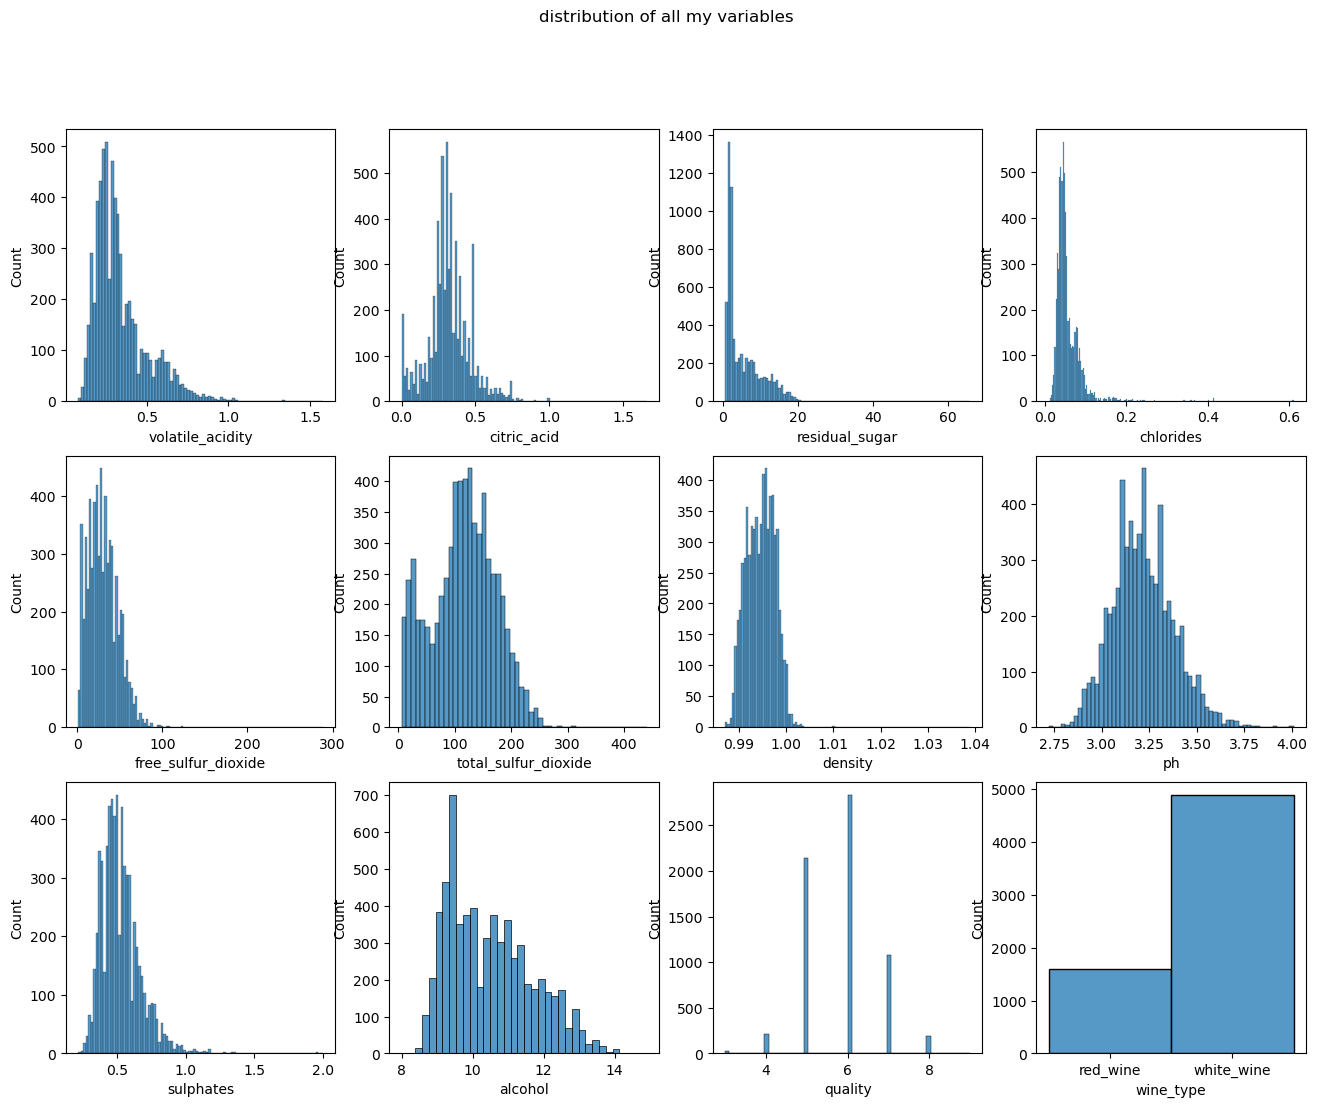

In [29]:
plt.figure(figsize=(16,12))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, cols in enumerate(df.columns[1:]):
    # print(i, cols)

    plt.subplot(3,4,i+1)
    sns.histplot(df[cols])

plt.suptitle('distribution of all my variables')
plt.show()

NameError: name 'tr_sub' is not defined

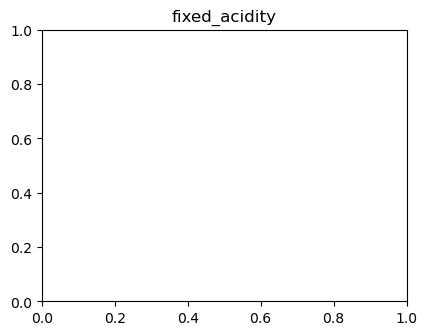

In [13]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['fixed_acidity','volatile_acidity','citric_acid'
        ,'residual_sugar','chlorides','free_sulfur_dioxide'
       ,'total_sulfur_dioxide','density','ph','sulphates'
        ,'alcohol','quality','wine_type']

for i, col in enumerate(cols):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,3, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    tr_sub[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

In [ ]:
#distribution of all my variables
plt.figure(figsize=(14,4))

for i, col in enumerate(train.columns[:-3]):
    plt.subplot(1,len(train.columns[:-3]),i+1)
    plt.hist(train[col], bins=20)
    plt.title(col)